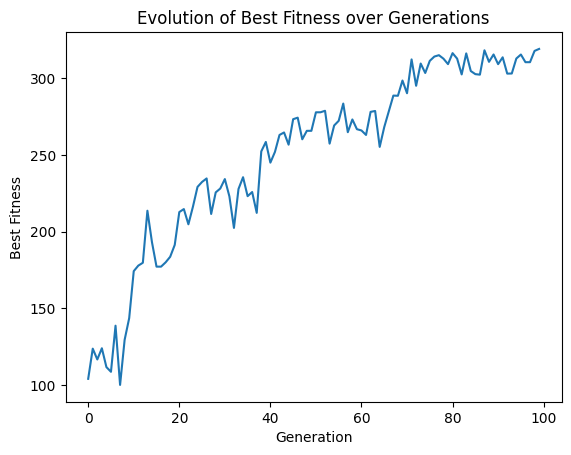

In [5]:
# Mutation - bitflip_mutation, Crossover - one_point_crossover, Parent Selection - roulette_wheel_selection

import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, Label, Entry, Button, OptionMenu, StringVar

class GeneticAlgorithm:
    def __init__(self, pop_size=100, dimensions=10, min_val=-5.12, max_val=5.12, num_generations=100, mutation_rate=0.1, crossover_rate=0.8):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.min_val = min_val
        self.max_val = max_val
        self.num_generations = num_generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def rastrigin(self, x):
        A = 10
        return A * self.dimensions + np.sum(x**2 - A * np.cos(2 * np.pi * x))

    def initialize_population(self):
        return np.random.uniform(low=self.min_val, high=self.max_val, size=(self.pop_size, self.dimensions))

    @staticmethod
    def one_point_crossover(parents):
        crossover_point = np.random.randint(1, parents.shape[1])
        offspring = np.empty_like(parents)

        for i in range(parents.shape[0]):
            parent1_idx = i % parents.shape[0]
            parent2_idx = (i+1) % parents.shape[0]
            offspring[i, :crossover_point] = parents[parent1_idx, :crossover_point]
            offspring[i, crossover_point:] = parents[parent2_idx, crossover_point:]

        return offspring

    def bitflip_mutation(self, offspring):
        mask = np.random.random(size=offspring.shape) < self.mutation_rate
        offspring[mask] = 1 - offspring[mask]
        return offspring

    def roulette_wheel_selection(self, population, fitness):
        probabilities = fitness / np.sum(fitness)
        selected_indices = np.random.choice(len(fitness), size=len(fitness), p=probabilities)
        return population[selected_indices], selected_indices

    def evolve(self, mutation_method, crossover_method, parent_selection_method):
        population = self.initialize_population()
        best_fitnesses = []

        for generation in range(self.num_generations):
            fitness = np.apply_along_axis(self.rastrigin, 1, population)
            best_fitness = np.min(fitness)
            best_fitnesses.append(best_fitness)

            parents, _ = parent_selection_method(population, fitness)
            offspring_crossover = crossover_method(parents)
            offspring_mutation = mutation_method(offspring_crossover)

            population = offspring_mutation

        return best_fitnesses

def run_genetic_algorithm():
    pop_size = 100
    dimensions = 10
    min_val = -5.12
    max_val = 5.12
    num_generations = 100
    mutation_rate = 0.1
    crossover_rate = 0.8

    ga = GeneticAlgorithm(pop_size, dimensions, min_val, max_val, num_generations, mutation_rate, crossover_rate)

    mutation_method = ga.bitflip_mutation
    crossover_method = ga.one_point_crossover
    parent_selection_method = ga.roulette_wheel_selection

    best_fitnesses = ga.evolve(mutation_method, crossover_method, parent_selection_method)

    plt.plot(best_fitnesses)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Evolution of Best Fitness over Generations')
    plt.show()

if __name__ == "__main__":
    run_genetic_algorithm()


Generation: 0, Best Fitness: 112.85822368832925
Generation: 10, Best Fitness: 61.21294378558948
Generation: 20, Best Fitness: 27.41355921553631
Generation: 30, Best Fitness: 27.41355921553631
Generation: 40, Best Fitness: 26.687495378229514
Generation: 50, Best Fitness: 26.687495378229514
Generation: 60, Best Fitness: 26.687495378229514
Generation: 70, Best Fitness: 26.687495378229514
Generation: 80, Best Fitness: 26.687495378229514
Generation: 90, Best Fitness: 26.687495378229514


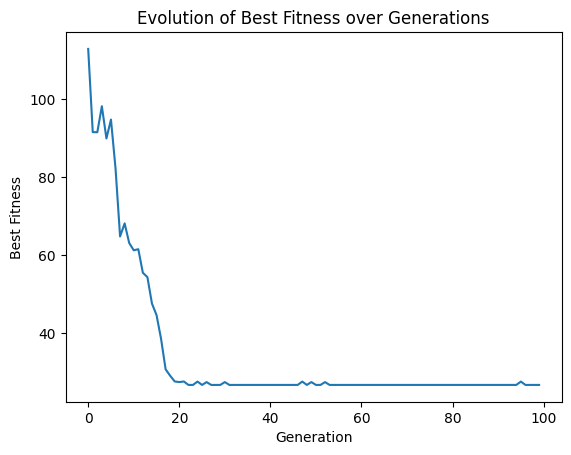

In [7]:
#Mutation - bitflip_mutation, Crossover - one_point_crossover, Parent Selection - tournament_selection
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, pop_size=100, dimensions=10, min_val=-5.12, max_val=5.12, num_generations=100, mutation_rate=0.1, crossover_rate=0.8):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.min_val = min_val
        self.max_val = max_val
        self.num_generations = num_generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def rastrigin(self, x):
        A = 10
        return A * self.dimensions + np.sum(x**2 - A * np.cos(2 * np.pi * x))

    def initialize_population(self):
        return np.random.uniform(low=self.min_val, high=self.max_val, size=(self.pop_size, self.dimensions))

    @staticmethod
    def one_point_crossover(parents):
        crossover_point = np.random.randint(1, parents.shape[1])
        offspring = np.empty_like(parents)

        for i in range(parents.shape[0]):
            parent1_idx = i % parents.shape[0]
            parent2_idx = (i+1) % parents.shape[0]
            offspring[i, :crossover_point] = parents[parent1_idx, :crossover_point]
            offspring[i, crossover_point:] = parents[parent2_idx, crossover_point:]

        return offspring

    def bitflip_mutation(self, offspring):
        mask = np.random.random(size=offspring.shape) < self.mutation_rate
        offspring[mask] = 1 - offspring[mask]
        return offspring

    def tournament_selection(self, population, fitness, tournament_size=2):
        selected_indices = []
        for _ in range(len(fitness)):
            tournament_indices = np.random.choice(len(fitness), size=tournament_size, replace=False)
            tournament_fitness = fitness[tournament_indices]
            selected_indices.append(tournament_indices[np.argmin(tournament_fitness)])
        return population[selected_indices], selected_indices

    def evolve(self, mutation_method, crossover_method, parent_selection_method, survivor_selection_method):
        population = self.initialize_population()
        best_fitnesses = []

        for generation in range(self.num_generations):
            fitness = np.apply_along_axis(self.rastrigin, 1, population)
            best_fitness = np.min(fitness)
            best_fitnesses.append(best_fitness)

            parents, _ = parent_selection_method(population, fitness)
            offspring_crossover = crossover_method(parents)
            offspring_mutation = mutation_method(offspring_crossover)

            population = survivor_selection_method(population, offspring_mutation, fitness)

            # Print best fitness for every 10th generation
            if generation % 10 == 0:
                print(f"Generation: {generation}, Best Fitness: {best_fitness}")

        return best_fitnesses

def copy_population(population, offspring, fitness):
    return np.copy(offspring)

def run_genetic_algorithm():
    pop_size = 100
    dimensions = 10
    min_val = -5.12
    max_val = 5.12
    num_generations = 100
    mutation_rate = 0.1
    crossover_rate = 0.8

    ga = GeneticAlgorithm(pop_size, dimensions, min_val, max_val, num_generations, mutation_rate, crossover_rate)

    mutation_method = ga.bitflip_mutation
    crossover_method = ga.one_point_crossover
    parent_selection_method = ga.tournament_selection

    best_fitnesses = ga.evolve(mutation_method, crossover_method, parent_selection_method, copy_population)

    plt.plot(best_fitnesses)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Evolution of Best Fitness over Generations')
    plt.show()

if __name__ == "__main__":
    run_genetic_algorithm()


Generation: 0, Best Fitness: 123.00013126319172
Generation: 10, Best Fitness: 124.4433971650324
Generation: 20, Best Fitness: 179.02225173620724
Generation: 30, Best Fitness: 241.66393415446646
Generation: 40, Best Fitness: 257.9782283502598
Generation: 50, Best Fitness: 272.1818760264231
Generation: 60, Best Fitness: 287.99436577947256
Generation: 70, Best Fitness: 278.3651348218118
Generation: 80, Best Fitness: 281.1045631304857
Generation: 90, Best Fitness: 318.1479951283213


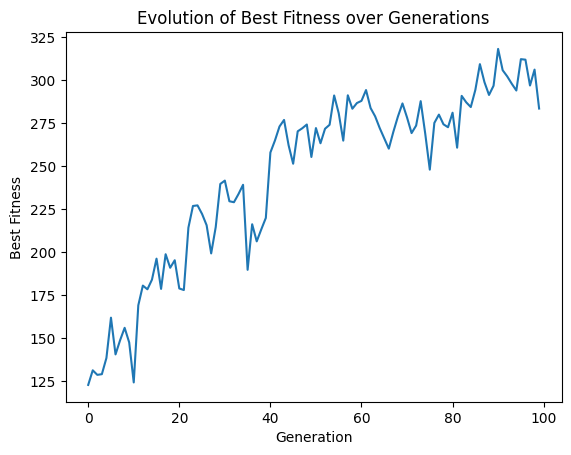

In [8]:
#Mutation - gaussian_mutation, Crossover - two_point_crossover, Parent Selection - roulette_wheel_selection
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, pop_size=100, dimensions=10, min_val=-5.12, max_val=5.12, num_generations=100, mutation_rate=0.1, crossover_rate=0.8):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.min_val = min_val
        self.max_val = max_val
        self.num_generations = num_generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def rastrigin(self, x):
        A = 10
        return A * self.dimensions + np.sum(x**2 - A * np.cos(2 * np.pi * x))

    def initialize_population(self):
        return np.random.uniform(low=self.min_val, high=self.max_val, size=(self.pop_size, self.dimensions))

    @staticmethod
    def two_point_crossover(parents):
        crossover_points = sorted(np.random.choice(parents.shape[1], 2, replace=False))
        offspring = np.empty_like(parents)

        for i in range(parents.shape[0]):
            parent1_idx = i % parents.shape[0]
            parent2_idx = (i+1) % parents.shape[0]
            offspring[i, :crossover_points[0]] = parents[parent1_idx, :crossover_points[0]]
            offspring[i, crossover_points[0]:crossover_points[1]] = parents[parent2_idx, crossover_points[0]:crossover_points[1]]
            offspring[i, crossover_points[1]:] = parents[parent1_idx, crossover_points[1]:]

        return offspring

    def gaussian_mutation(self, offspring):
        mask = np.random.random(size=offspring.shape) < self.mutation_rate
        mutation_amounts = np.random.normal(loc=0, scale=0.1, size=offspring.shape)
        offspring += mask * mutation_amounts
        return offspring

    def roulette_wheel_selection(self, population, fitness):
        probabilities = fitness / np.sum(fitness)
        selected_indices = np.random.choice(len(fitness), size=len(fitness), p=probabilities)
        return population[selected_indices], selected_indices

    def evolve(self, mutation_method, crossover_method, parent_selection_method, survivor_selection_method):
        population = self.initialize_population()
        best_fitnesses = []

        for generation in range(self.num_generations):
            fitness = np.apply_along_axis(self.rastrigin, 1, population)
            best_fitness = np.min(fitness)
            best_fitnesses.append(best_fitness)

            parents, _ = parent_selection_method(population, fitness)
            offspring_crossover = crossover_method(parents)
            offspring_mutation = mutation_method(offspring_crossover)

            population = survivor_selection_method(population, offspring_mutation, fitness)

            # Print best fitness for every 10th generation
            if generation % 10 == 0:
                print(f"Generation: {generation}, Best Fitness: {best_fitness}")

        return best_fitnesses

def copy_population(population, offspring, fitness):
    return np.copy(offspring)

def run_genetic_algorithm():
    pop_size = 100
    dimensions = 10
    min_val = -5.12
    max_val = 5.12
    num_generations = 100
    mutation_rate = 0.1
    crossover_rate = 0.8

    ga = GeneticAlgorithm(pop_size, dimensions, min_val, max_val, num_generations, mutation_rate, crossover_rate)

    mutation_method = ga.gaussian_mutation
    crossover_method = ga.two_point_crossover
    parent_selection_method = ga.roulette_wheel_selection

    best_fitnesses = ga.evolve(mutation_method, crossover_method, parent_selection_method, copy_population)

    plt.plot(best_fitnesses)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Evolution of Best Fitness over Generations')
    plt.show()

if __name__ == "__main__":
    run_genetic_algorithm()


Generation: 0, Best Fitness: 112.15983745058185
Generation: 10, Best Fitness: 27.470443554497436
Generation: 20, Best Fitness: 10.392318085144623
Generation: 30, Best Fitness: 7.165072422098277
Generation: 40, Best Fitness: 6.654245753641817
Generation: 50, Best Fitness: 6.010244692407653
Generation: 60, Best Fitness: 6.004707251014679
Generation: 70, Best Fitness: 5.574091853578523
Generation: 80, Best Fitness: 5.341114542736065
Generation: 90, Best Fitness: 5.807489911643728


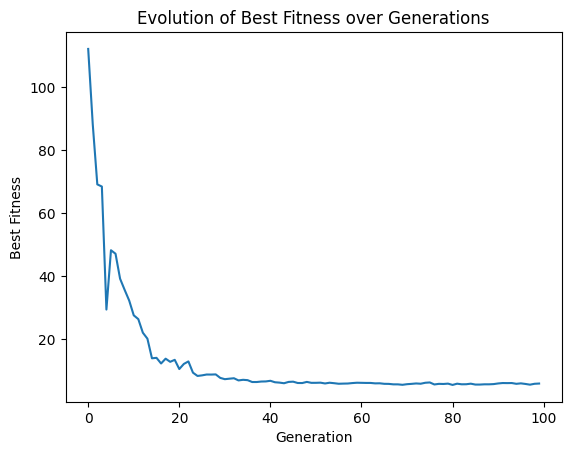

In [9]:
#Mutation - gaussian_mutation, Crossover - two_point_crossover, Parent Selection - tournament_selection
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, pop_size=100, dimensions=10, min_val=-5.12, max_val=5.12, num_generations=100, mutation_rate=0.1, crossover_rate=0.8):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.min_val = min_val
        self.max_val = max_val
        self.num_generations = num_generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def rastrigin(self, x):
        A = 10
        return A * self.dimensions + np.sum(x**2 - A * np.cos(2 * np.pi * x))

    def initialize_population(self):
        return np.random.uniform(low=self.min_val, high=self.max_val, size=(self.pop_size, self.dimensions))

    @staticmethod
    def two_point_crossover(parents):
        crossover_points = sorted(np.random.choice(parents.shape[1], 2, replace=False))
        offspring = np.empty_like(parents)

        for i in range(parents.shape[0]):
            parent1_idx = i % parents.shape[0]
            parent2_idx = (i+1) % parents.shape[0]
            offspring[i, :crossover_points[0]] = parents[parent1_idx, :crossover_points[0]]
            offspring[i, crossover_points[0]:crossover_points[1]] = parents[parent2_idx, crossover_points[0]:crossover_points[1]]
            offspring[i, crossover_points[1]:] = parents[parent1_idx, crossover_points[1]:]

        return offspring

    def gaussian_mutation(self, offspring):
        mask = np.random.random(size=offspring.shape) < self.mutation_rate
        mutation_amounts = np.random.normal(loc=0, scale=0.1, size=offspring.shape)
        offspring += mask * mutation_amounts
        return offspring

    def tournament_selection(self, population, fitness, tournament_size=2):
        selected_indices = []
        for _ in range(len(fitness)):
            tournament_indices = np.random.choice(len(fitness), size=tournament_size, replace=False)
            tournament_fitness = fitness[tournament_indices]
            selected_indices.append(tournament_indices[np.argmin(tournament_fitness)])
        return population[selected_indices], selected_indices

    def evolve(self, mutation_method, crossover_method, parent_selection_method, survivor_selection_method):
        population = self.initialize_population()
        best_fitnesses = []

        for generation in range(self.num_generations):
            fitness = np.apply_along_axis(self.rastrigin, 1, population)
            best_fitness = np.min(fitness)
            best_fitnesses.append(best_fitness)

            parents, _ = parent_selection_method(population, fitness)
            offspring_crossover = crossover_method(parents)
            offspring_mutation = mutation_method(offspring_crossover)

            population = survivor_selection_method(population, offspring_mutation, fitness)

            # Print best fitness for every 10th generation
            if generation % 10 == 0:
                print(f"Generation: {generation}, Best Fitness: {best_fitness}")

        return best_fitnesses

def copy_population(population, offspring, fitness):
    return np.copy(offspring)

def run_genetic_algorithm():
    pop_size = 100
    dimensions = 10
    min_val = -5.12
    max_val = 5.12
    num_generations = 100
    mutation_rate = 0.1
    crossover_rate = 0.8

    ga = GeneticAlgorithm(pop_size, dimensions, min_val, max_val, num_generations, mutation_rate, crossover_rate)

    mutation_method = ga.gaussian_mutation
    crossover_method = ga.two_point_crossover
    parent_selection_method = ga.tournament_selection

    best_fitnesses = ga.evolve(mutation_method, crossover_method, parent_selection_method, copy_population)

    plt.plot(best_fitnesses)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Evolution of Best Fitness over Generations')
    plt.show()

if __name__ == "__main__":
    run_genetic_algorithm()


Generation: 0, Best Fitness: 119.76117353422875
Generation: 10, Best Fitness: 192.31660457007595
Generation: 20, Best Fitness: 113.9803468338709
Generation: 30, Best Fitness: 115.6376926136546
Generation: 40, Best Fitness: 117.68388553429472
Generation: 50, Best Fitness: 96.2661727978446
Generation: 60, Best Fitness: 91.25796890917037
Generation: 70, Best Fitness: 89.50953392351613
Generation: 80, Best Fitness: 85.6521809042519
Generation: 90, Best Fitness: 77.34757208250625


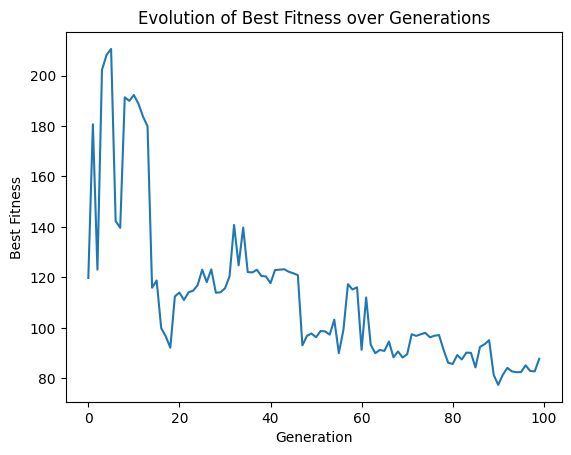

In [10]:
#Mutation - uniform_mutation, Crossover - n_point_crossover, Parent Selection - roulette_wheel_selection,
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, pop_size=100, dimensions=10, min_val=-5.12, max_val=5.12, num_generations=100, mutation_rate=0.1, crossover_rate=0.8):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.min_val = min_val
        self.max_val = max_val
        self.num_generations = num_generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def rastrigin(self, x):
        A = 10
        return A * self.dimensions + np.sum(x**2 - A * np.cos(2 * np.pi * x))

    def initialize_population(self):
        return np.random.uniform(low=self.min_val, high=self.max_val, size=(self.pop_size, self.dimensions))

    @staticmethod
    def n_point_crossover(parents, n=2):
        if n >= parents.shape[1]:
            n = parents.shape[1] - 1  # Ensure n is within valid range
        crossover_points = np.sort(np.random.choice(parents.shape[1] - 1, n, replace=False))
        offspring = np.empty_like(parents)

        for i in range(parents.shape[0]):
            for j in range(n):
                if j % 2 == 0:
                    start = crossover_points[j]
                    end = crossover_points[j + 1] if j + 1 < n else parents.shape[1]
                    offspring[i, start:end] = parents[i % 2, start:end]
                else:
                    start = crossover_points[j]
                    end = crossover_points[j + 1] if j + 1 < n else parents.shape[1]
                    offspring[i, start:end] = parents[(i + 1) % 2, start:end]

        return offspring

    def uniform_mutation(self, offspring):
        mask = np.random.random(size=offspring.shape) < self.mutation_rate
        mutation_amounts = np.random.uniform(low=-0.1, high=0.1, size=offspring.shape)
        offspring += mask * mutation_amounts
        return offspring

    def roulette_wheel_selection(self, population, fitness):
        probabilities = fitness / np.sum(fitness)
        selected_indices = np.random.choice(len(fitness), size=len(fitness), p=probabilities)
        return population[selected_indices], selected_indices

    def evolve(self, mutation_method, crossover_method, parent_selection_method, survivor_selection_method):
        population = self.initialize_population()
        best_fitnesses = []

        for generation in range(self.num_generations):
            fitness = np.apply_along_axis(self.rastrigin, 1, population)
            best_fitness = np.min(fitness)
            best_fitnesses.append(best_fitness)

            parents, _ = parent_selection_method(population, fitness)
            offspring_crossover = crossover_method(parents)
            offspring_mutation = mutation_method(offspring_crossover)

            population = survivor_selection_method(population, offspring_mutation, fitness)

            # Print best fitness for every 10th generation
            if generation % 10 == 0:
                print(f"Generation: {generation}, Best Fitness: {best_fitness}")

        return best_fitnesses

def copy_population(population, offspring, fitness):
    return np.copy(offspring)

def run_genetic_algorithm():
    pop_size = 100
    dimensions = 10
    min_val = -5.12
    max_val = 5.12
    num_generations = 100
    mutation_rate = 0.1
    crossover_rate = 0.8

    ga = GeneticAlgorithm(pop_size, dimensions, min_val, max_val, num_generations, mutation_rate, crossover_rate)

    mutation_method = ga.uniform_mutation
    crossover_method = ga.n_point_crossover
    parent_selection_method = ga.roulette_wheel_selection

    best_fitnesses = ga.evolve(mutation_method, crossover_method, parent_selection_method, copy_population)

    plt.plot(best_fitnesses)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Evolution of Best Fitness over Generations')
    plt.show()

if __name__ == "__main__":
    run_genetic_algorithm()


Generation: 0, Best Fitness: 109.94184718386097
Generation: 10, Best Fitness: 99.63882063474996
Generation: 20, Best Fitness: 88.12095269860065
Generation: 30, Best Fitness: 84.36626040974426
Generation: 40, Best Fitness: 68.53870826346878
Generation: 50, Best Fitness: 58.138218900141595
Generation: 60, Best Fitness: 56.92576261964668
Generation: 70, Best Fitness: 45.27666875699846
Generation: 80, Best Fitness: 42.86775556807723
Generation: 90, Best Fitness: 37.7913961491615


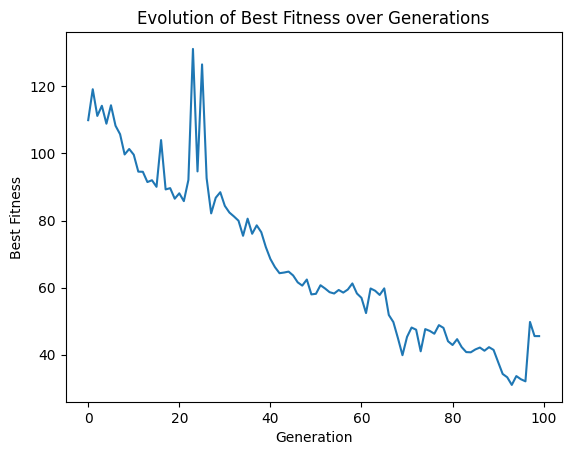

In [12]:
#Mutation - uniform_mutation, Crossover - n_point_crossover, Parent Selection - tournament_selection,
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, pop_size=100, dimensions=10, min_val=-5.12, max_val=5.12, num_generations=100, mutation_rate=0.1, crossover_rate=0.8):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.min_val = min_val
        self.max_val = max_val
        self.num_generations = num_generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

    def rastrigin(self, x):
        A = 10
        return A * self.dimensions + np.sum(x**2 - A * np.cos(2 * np.pi * x))

    def initialize_population(self):
        return np.random.uniform(low=self.min_val, high=self.max_val, size=(self.pop_size, self.dimensions))

    def n_point_crossover(self, parents, n=2):
        if n >= self.dimensions:
            n = self.dimensions - 1  # Ensure n is within valid range
        crossover_points = np.sort(np.random.choice(self.dimensions - 1, n, replace=False))
        offspring = np.empty_like(parents)

        for i in range(parents.shape[0]):
            for j in range(n):
                if j % 2 == 0:
                    start = crossover_points[j]
                    end = crossover_points[j + 1] if j + 1 < n else self.dimensions
                    offspring[i, start:end] = parents[i % 2, start:end]
                else:
                    start = crossover_points[j]
                    end = crossover_points[j + 1] if j + 1 < n else self.dimensions
                    offspring[i, start:end] = parents[(i + 1) % 2, start:end]

        return offspring

    def uniform_mutation(self, offspring):
        mask = np.random.random(size=offspring.shape) < self.mutation_rate
        mutation_amounts = np.random.uniform(low=-0.1, high=0.1, size=offspring.shape)
        offspring += mask * mutation_amounts
        return offspring

    def tournament_selection(self, population, fitness, tournament_size=2):
        selected_indices = []
        for _ in range(len(fitness)):
            tournament_indices = np.random.choice(len(fitness), size=tournament_size, replace=False)
            tournament_fitness = fitness[tournament_indices]
            selected_indices.append(tournament_indices[np.argmin(tournament_fitness)])
        return population[selected_indices], selected_indices

    def evolve(self, mutation_method, crossover_method, parent_selection_method):
        population = self.initialize_population()
        best_fitnesses = []

        for generation in range(self.num_generations):
            fitness = np.apply_along_axis(self.rastrigin, 1, population)
            best_fitness = np.min(fitness)
            best_fitnesses.append(best_fitness)

            parents, _ = parent_selection_method(population, fitness)
            offspring_crossover = crossover_method(parents)
            offspring_mutation = mutation_method(offspring_crossover)

            # Update population with offspring
            population = offspring_mutation

            # Print best fitness for every 10th generation
            if generation % 10 == 0:
                print(f"Generation: {generation}, Best Fitness: {best_fitness}")

        return best_fitnesses

def copy_population(population, offspring, fitness):
    return np.copy(offspring)

def run_genetic_algorithm():
    pop_size = 100
    dimensions = 10
    min_val = -5.12
    max_val = 5.12
    num_generations = 100
    mutation_rate = 0.1
    crossover_rate = 0.8

    ga = GeneticAlgorithm(pop_size, dimensions, min_val, max_val, num_generations, mutation_rate, crossover_rate)

    mutation_method = ga.uniform_mutation
    crossover_method = ga.n_point_crossover
    parent_selection_method = ga.tournament_selection

    best_fitnesses = ga.evolve(mutation_method, crossover_method, parent_selection_method)

    plt.plot(best_fitnesses)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Evolution of Best Fitness over Generations')
    plt.show()

if __name__ == "__main__":
    run_genetic_algorithm()
